In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib.cm as cm
    
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table

import jsm_routines
import galhalo
import os

>>> Normalizing primordial power spectrum P(k)=(k/k_0)^n_s ...
    such that sigma(R=8Mpc/h) =   0.8000.
>>> Tabulating sigma(M,z=0) ...
    From now on, sigma(M,z) is computed by interpolation.
>>> Tabulating z(W) and z(t_lkbk)...
>>> Preparing output redshifts for merger trees ...
    Number of output redshifts =  354, up to z = 20.06
>>> Tabulating Parkinson+08 J(u_res) ...
>>> Building interpolation grid for Green+19 M(<r|f_b,c)...
>>> Building interpolation grid for Green+19 sigma(r|f_b,c)...
>>> Building interpolation grid for Green+19 d2Phidr2(r|f_b,c)...
>>> Building interpolator for Jiang+15 orbit sampler...


### SOME MISC apps

In [3]:
Nreal = 1
Nhalo = 1700

acc_mass = np.zeros(shape=(Nreal, Nhalo))

acc_redshift = np.zeros(shape=(Nreal, Nhalo))

In [ ]:
mass_clean, red_clean = accretion_mass(file)

print(len(mass_clean))

mass = np.pad(mass_clean, (0,Nhalo-len(mass_clean)), mode="constant", constant_values=0)

red = np.pad(red_clean, (0,Nhalo-len(red_clean)), mode="constant", constant_values=np.nan)

acc_mass[0,:] = mass

acc_redshift[0,:] = red

In [ ]:
mass_clean, red_clean = accretion_mass(file, plot_evo=True)

### unevolved

In [ ]:
datadir = "../../prelim/output_tree/"

In [ ]:
Nreal = len([entry for entry in os.listdir(datadir)])
Nhalo = 200

acc_mass = np.zeros(shape=(Nreal, Nhalo))

acc_redshift = np.zeros(shape=(Nreal, Nhalo))

In [ ]:
for i,filename in enumerate(os.listdir(datadir)):
        
    file = os.path.join(datadir, filename)
        
    mass_clean, red_clean = accretion_mass(file)
    
    mass = np.pad(mass_clean, (0,Nhalo-len(mass_clean)), mode="constant", constant_values=0)
    
    red = np.pad(red_clean, (0,Nhalo-len(red_clean)), mode="constant", constant_values=np.nan)
    
    acc_mass[i,:] = mass
    
    acc_redshift[i,:] = red

In [ ]:
SHMF(acc_mass, acc_redshift)

### surviving

In [ ]:
datadir = "../../prelim/output_evolve/"

In [ ]:
Nreal = len([entry for entry in os.listdir(datadir)])
Nhalo = 200

surv_mass = np.zeros(shape=(Nreal, Nhalo))

surv_redshift = np.zeros(shape=(Nreal, Nhalo))

In [ ]:
for i,filename in enumerate(os.listdir(datadir)):
        
    file = os.path.join(datadir, filename)
        
    mass_clean = surviving_mass(file, 10**9)
    
    mass = np.pad(mass_clean, (0,Nhalo-len(mass_clean)), mode="constant", constant_values=0)
        
    surv_mass[i,:] = mass

In [ ]:
SHMF(surv_mass, 0)

### accreation mass of surviving

In [ ]:
Nreal = len([entry for entry in os.listdir(datadir)])
Nhalo = 200

surv_acc_mass = np.zeros(shape=(Nreal, Nhalo))

surv_acc_redshift = np.zeros(shape=(Nreal, Nhalo))

In [ ]:
for i,filename in enumerate(os.listdir(datadir)):
        
    file = os.path.join(datadir, filename)
        
    mass_clean, red_clean = accretion_mass_surv(file, 10**9)
    
    mass = np.pad(mass_clean, (0,Nhalo-len(mass_clean)), mode="constant", constant_values=0)
    
    red = np.pad(red_clean, (0,Nhalo-len(red_clean)), mode="constant", constant_values=np.nan)
    
    surv_acc_mass[i,:] = mass
    
    surv_acc_redshift[i,:] = red

### trying to recreate the SatGen plot

In [ ]:
data = np.load("../../data/12_4_0/numpy/surv_mass.npy")

In [ ]:
mass_frac = data
mass_frac[:, 0] = 0.0  # removing the host mass from the matrix
zero_mask = mass_frac != 0.0 
ana_mass = np.log10(np.where(zero_mask, mass_frac, np.nan))  # up until here the stats are good

In [ ]:
for i in range(200):
    test = ana_mass[i]

    counts, bins = np.histogram(test, bins=15, range=(-4, -0.1))

    binsize = (bins[1] - bins[0])
    bincenters = 0.5 * (bins[1:] + bins[:-1])

    plt.plot(bincenters, np.log10(counts))
plt.xlabel("halo mass m/M")
plt.show()

In [ ]:
# for a single host! (or realization)

for i in range(200):
    test = data[i]
    test[0] = 0.0
    new = np.log10(test[test != 0.0])
    
    counts, bins = np.histogram(new, bins=15, range=(8,12))

    binsize = (bins[1] - bins[0])
    bincenters = 0.5 * (bins[1:] + bins[:-1])

    plt.plot(bincenters, np.log10(counts))
plt.xlabel("halo mass")
plt.show()

### working out CMF with redshift evo

In [36]:
data = np.load("../../data/12_4_0/numpy/acc_surv_mass.npy")

red = np.load("../../data/12_4_0/numpy/acc_surv_redshift.npy")

In [29]:

data[:, 0] = 0.0  # removing the host mass from the matrix
zero_mask = data != 0.0 #masking the padding!
Mh = np.log10(np.where(zero_mask, data, np.nan)) #switching the to nans!


In [30]:
red[:, 0] = np.nan # removing the host mass from the matrix

In [32]:
Ms = galhalo.lgMs_RP17(Mh, z=red)

/Users/jsmonzon/Research/SatGen/notebooks/../src/galhalo.py:172: RuntimeWarning: overflow encountered in exp
  return delta*(np.log10(1.+np.exp(x)))**gamma/(1.+np.exp(10**(-x)))-\


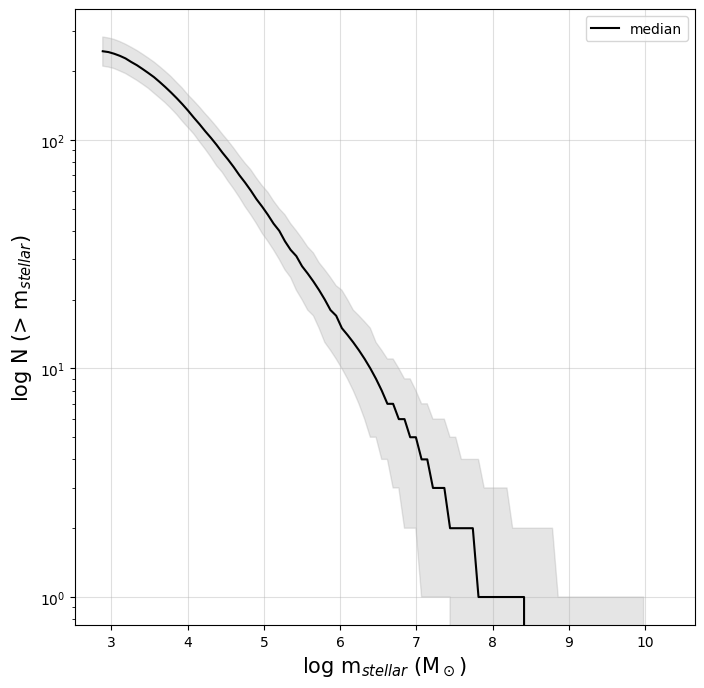

In [33]:
mass_range = np.linspace(np.nanmin(Ms), np.nanmax(Ms), 100)

I = np.zeros((Ms.shape[0], 100))

for i,realization in enumerate(Ms): #this double for loop can probably be replaced!
    for j,mass in enumerate(mass_range):
        I[i,j] = np.sum(realization > mass)
        
CSMF_quant = np.percentile(I, [5, 50, 95], axis=0) # the percentiles
        
plt.figure(figsize=(8, 8))

plt.plot(mass_range, CSMF_quant[1, :], label="median", color="black")
plt.fill_between(mass_range, y1=CSMF_quant[0, :], y2=CSMF_quant[2, :], alpha=0.2, color="grey")
plt.grid(alpha=0.4)
plt.yscale("log")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.legend()
plt.show()

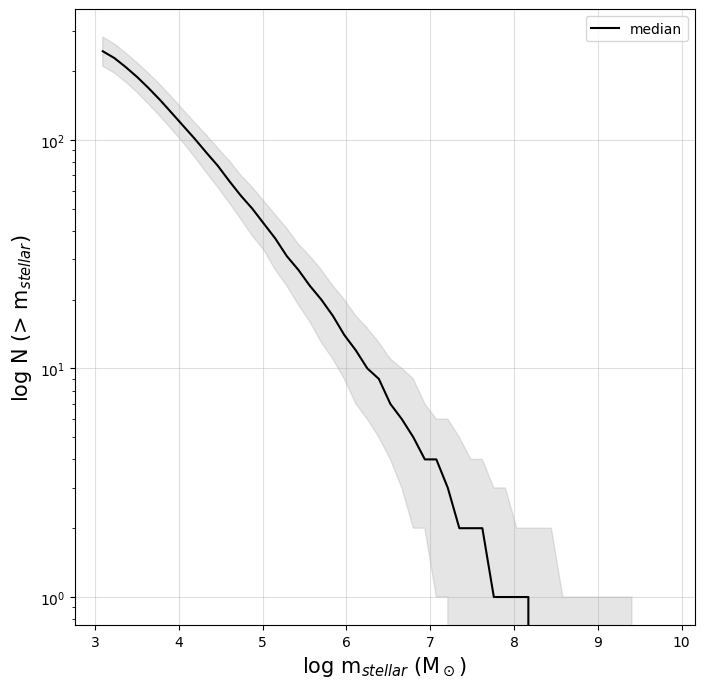

In [22]:
mass, quant = jsm_routines.CSMF(data)

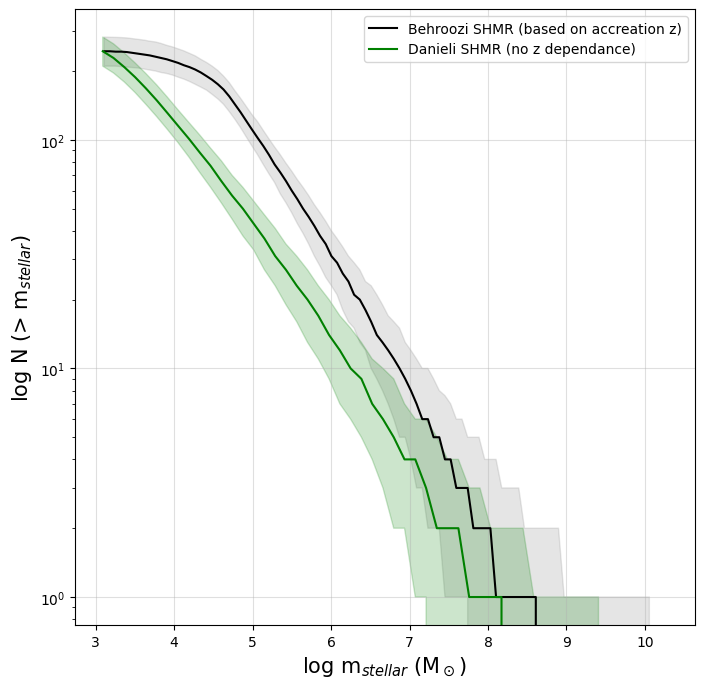

In [26]:
plt.figure(figsize=(8, 8))

plt.plot(mass_range, CSMF_quant[1, :], label="Behroozi SHMR (based on accreation z)", color="black")
plt.fill_between(mass_range, y1=CSMF_quant[0, :], y2=CSMF_quant[2, :], alpha=0.2, color="grey")

plt.plot(mass, quant[1, :], label="Danieli SHMR (no z dependance)", color="green")
plt.fill_between(mass, y1=quant[0, :], y2=quant[2, :], alpha=0.2, color="green")

plt.grid(alpha=0.4)
plt.yscale("log")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.legend()
plt.show()

/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_3270/326801359.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(galhalo.lgMs_D22_det(10**xs), np.log10(ys), label="sorting + \nthe median mass range")
/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_3270/326801359.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(mass, np.log10(quant[1]), label="no sorting + \nusing an evenly spaced mass range")
/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_3270/326801359.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(mass, y1=np.log10(quant[0]), y2=np.log10(quant[2]), alpha=0.2, color="grey")


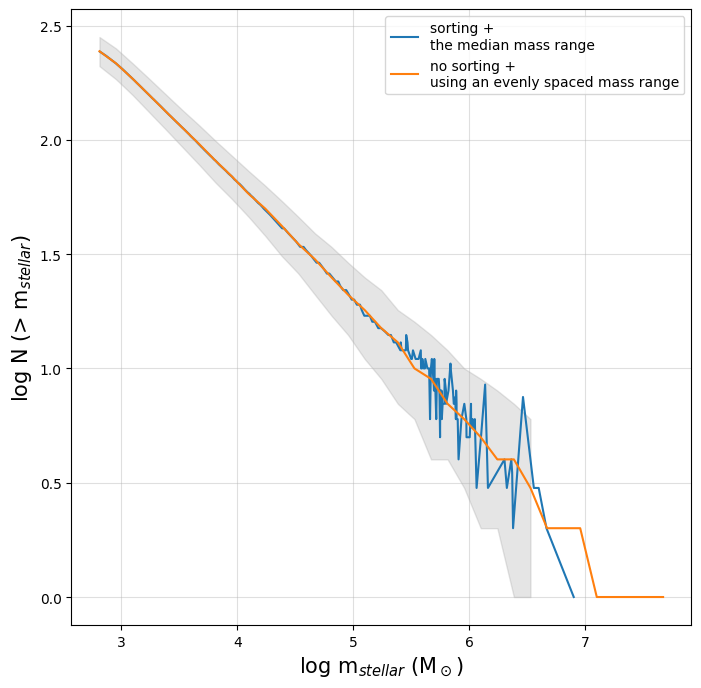

In [65]:
plt.figure(figsize=(8, 8))

plt.plot(galhalo.lgMs_D22_det(10**xs), np.log10(ys), label="sorting + \nthe median mass range")
plt.plot(mass, np.log10(quant[1]), label="no sorting + \nusing an evenly spaced mass range")
plt.fill_between(mass, y1=np.log10(quant[0]), y2=np.log10(quant[2]), alpha=0.2, color="grey")
plt.grid(alpha=0.4)
#plt.yscale("log")
#plt.xscale("log")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.legend()
plt.show()

In [129]:
###Now looking at the redshift evolution

In [130]:
def test_relation(lgMv, log_e, a):

    """
    returns the determinisitic stellar mass [M_sun]
    """
    
    #log_e = -1.5
    #a = 1.82
    lgMs = log_e + 12.5 + a*lgMv - a*12.5

    return lgMs


In [136]:
def new_relation(Mv, e, a):

    """
    non log form of the equation
    """
    
    #log_e = -1.5 , e = 0.031
    #a = 1.82
    M1=(10**12.5)
    intercept = e*(M1**(1-a))
    slope = (Mv**a)
    return intercept * slope


In [137]:
data = np.load("../../data/12_4_0/numpy/acc_surv_mass.npy")

data[:, 0] = 0.0  # removing the host mass from the matrix
zero_mask = data != 0.0 #masking the padding!
Mh = np.log10(np.where(zero_mask, data, np.nan)) #switching the to nans!

halo_mass = Mh[0]


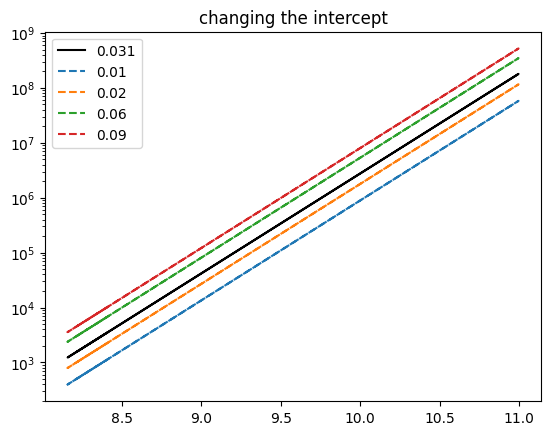

In [138]:
stellar_mass = new_relation(10**halo_mass, 0.031, 1.82)
intercept_vals = [0.01, 0.02, 0.06, 0.09]

plt.title("changing the intercept")
plt.plot(halo_mass, stellar_mass, label="0.031", color="black")
for i in intercept_vals:
    plt.plot(halo_mass, new_relation(10**halo_mass, i, 1.82), ls="--", label=str(i))
plt.legend()
plt.yscale("log")
plt.show()

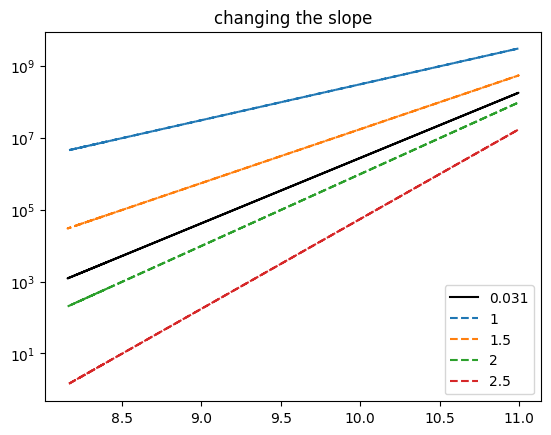

In [139]:
stellar_mass = new_relation(10**halo_mass, 0.031, 1.82)
slope_vals = [1, 1.5, 2, 2.5]

plt.title("changing the slope")
plt.plot(halo_mass, stellar_mass, label="0.031", color="black")
for i in slope_vals:
    plt.plot(halo_mass, new_relation(10**halo_mass, 0.031, i), ls="--", label=str(i))
plt.legend()
plt.yscale("log")
plt.show()

### trying to make the CSMF faster

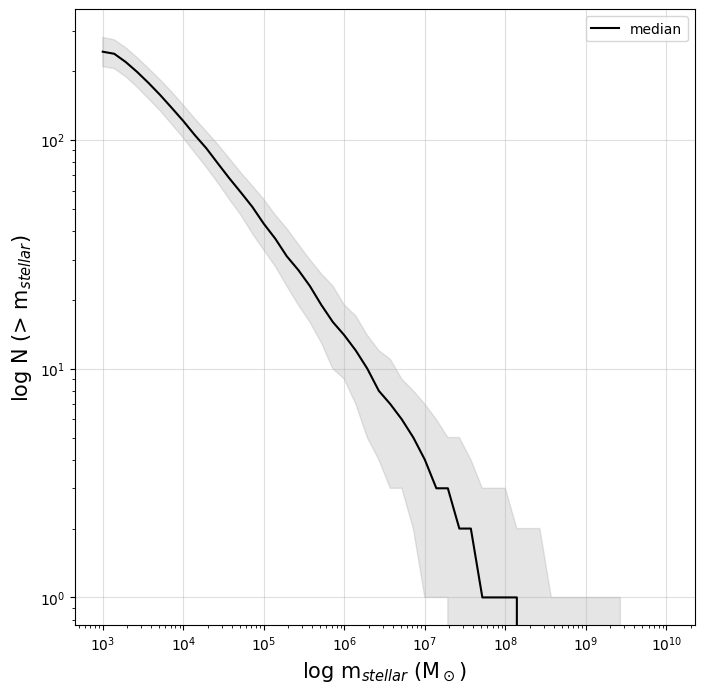

In [3]:
as_data = np.load("../../data/12_4_0/numpy/acc_surv_mass.npy")
as_red = np.load("../../data/12_4_0/numpy/acc_surv_redshift.npy")

Ms = jsm_routines.SHMR(as_data)

surv_massr, surv_CSMF = jsm_routines.CSMF(Ms) # accreation mass of the surviving halos!

In [38]:
Ms

array([[       nan, 3.20597818, 4.17059232, ...,        nan,        nan,
               nan],
       [       nan, 3.1190644 , 3.89504532, ...,        nan,        nan,
               nan],
       [       nan, 4.73279814, 4.13655553, ...,        nan,        nan,
               nan],
       ...,
       [       nan, 6.23450678, 4.39941995, ...,        nan,        nan,
               nan],
       [       nan, 3.20672601, 5.06747028, ...,        nan,        nan,
               nan],
       [       nan, 3.66680885, 3.17404001, ...,        nan,        nan,
               nan]])

In [4]:
max_real = Ms.shape[1] - np.sum(np.isnan(Ms),axis=1)

npix = 50

mass_range = np.logspace(3,10,npix)


In [5]:
I = np.zeros((Ms.shape[0], npix))

for i,realization in enumerate(Ms): #this double for loop can probably be replaced!
    for j,mass in enumerate(mass_range):
        I[i,j] = np.sum(realization[1:max_real[i]] > np.log10(mass))

In [6]:
I_new = np.zeros((Ms.shape[0], npix))


for i,realization in enumerate(Ms): #this double for loop can probably be replaced!
    for j,mass in enumerate(mass_range):
        I_new[i,j] = np.sum(realization > np.log10(mass))

In [49]:
test = np.sum(Ms > np.log10(mass_range[0]),axis=1)

In [7]:
I_best = np.zeros((npix, Ms.shape[0]))

for i,val in enumerate(mass_range):

    I_best[i] = np.sum(Ms > np.log10(val),axis=1)

In [17]:
CSMF_quant = np.percentile(I_best.transpose(), [5, 50, 95], axis=0) # the percentiles

In [20]:
CSMF_quant[2] - CSMF_quant[0]

array([71.6, 69. , 64. , 59. , 54. , 50. , 45. , 40. , 36. , 33. , 31. ,
       28. , 25. , 24. , 22. , 19. , 18. , 16. , 14. , 13. , 13. , 10. ,
       10. ,  9. ,  8. ,  8. ,  6. ,  6. ,  6. ,  5. ,  4. ,  5. ,  4. ,
        3. ,  3. ,  3. ,  2. ,  2. ,  2. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  0. ,  0. ,  0. ,  0. ])

### testing the SMF

In [5]:
as_data = np.load("../../data/12_4_0/numpy/acc_surv_mass.npy")
as_red = np.load("../../data/12_4_0/numpy/acc_surv_redshift.npy")

In [6]:
def CSMF_1D(Ms, Npix=50, plot=True):

    """
    calculates the cumulative satellite mass function given a number of mass ind
    input mass should not be in log space
    """
    # the same x-array for all the CSMFs
    mass_range = np.logspace(3,10,Npix)
    I = [np.sum(Ms > np.log10(i)) for i in mass_range]
                    
    if plot==True:
        
        plt.figure(figsize=(8, 8))

        plt.plot(mass_range, I, color="black")
        plt.grid(alpha=0.4)
        plt.yscale("log")
        plt.xscale("log")
        plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
        plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
        plt.legend()
        plt.show()

    return I

In [7]:
test = []
 
for i in range(100):

    Mh = as_data[i]
    Mh[0] = 0.0  # removing the host mass from the matrix
    zero_mask = Mh != 0.0 
    Mh = np.log10(np.where(zero_mask, Mh, np.nan)) #switching the to nans!

    test.append(CSMF_1D(galhalo.lgMs_D22_det(Mh), plot=False))

mass_range = np.logspace(3,10,50)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


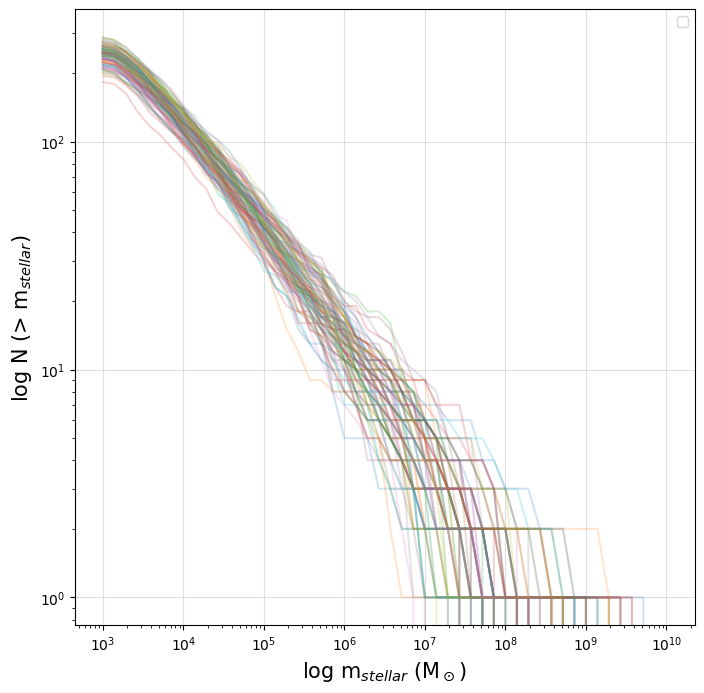

In [8]:

plt.figure(figsize=(8, 8))

for i in test:
    plt.plot(mass_range, i, alpha=0.2)
plt.grid(alpha=0.4)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.legend()
plt.show()
